## Loading a polarized optical microscope (POM) image

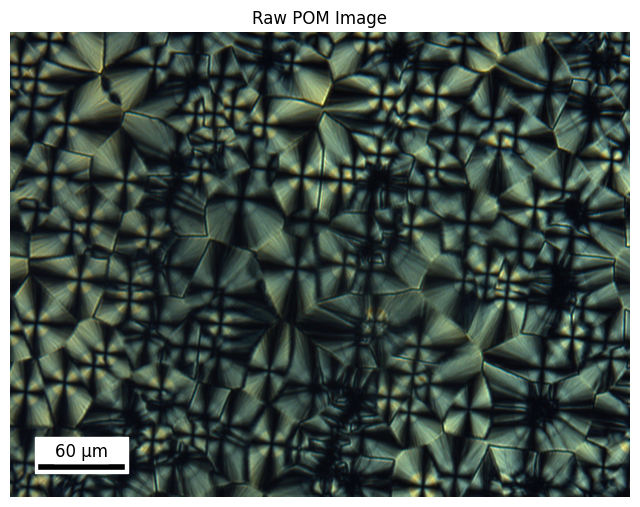

In [ ]:
import sys
sys.path.append("../../src/data_loading")  # Ensure Python finds the module

import image_loader

# Define image path
image_path = "../../data/raw/S33.tif"

# Load the raw POM image
raw_image = image_loader.load_pom_image(image_path)

# Display the POM image with a scale bar included
sys.path.append("../../src/visualization")  # Ensure Python finds the module
import image_with_scale_bar

image_with_scale_bar.display_image(raw_image, title = "Raw POM Image")


## Preprocessing the image

In [1]:
sys.path.append("../../src/preprocessing")  # Ensure Python finds the module
import preprocessing

# Convert to grayscale
preprocessed = preprocessing.GrayConverter.convert_to_gray(raw_image)

# Histogram Equalization (Improves contrast for better thresholding)
preprocessed = preprocessing.GrayConverter.equalize_histogram(preprocessed)

# Gaussian Blur to reduce noise (faster kernel size)
preprocessed = preprocessing.apply_gaussian_blur(preprocessed, kernel_size=3)

# Compute optimized Gradient Magnitude
preprocessed = preprocessing.compute_gradient_magnitude(preprocessed)

# Apply Otsu's Thresholding
preprocessed = preprocessing.apply_otsu_thresholding(preprocessed)

# Morphological Opening (Fast variant)
preprocessed = preprocessing.apply_morphological_opening(preprocessed, kernel_size=2, iterations=1)

# Compute Markers (More efficient)
preprocessed = preprocessing.compute_markers(preprocessed)

# Display the preprocessed image
image_with_scale_bar.display_image(preprocessed, title="Preprocessed Image")


NameError: name 'sys' is not defined

## Image segmentation using watershed algorithm

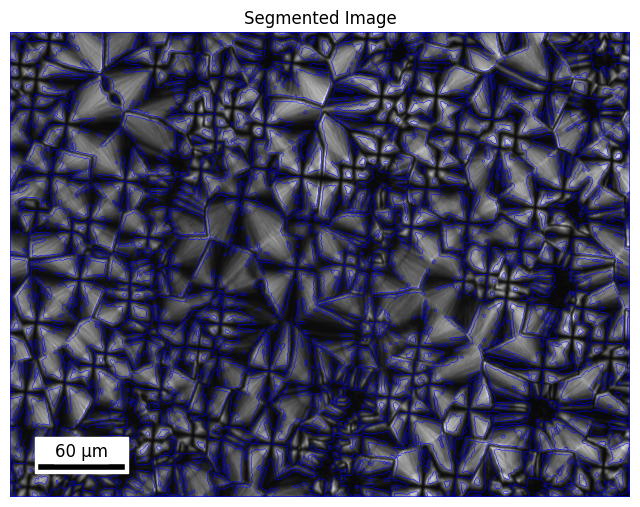

In [ ]:
sys.path.append("../../src/segmentation")  # Ensure Python finds the module

import watershed_segmentation

# Applying watershed segmentation
segmented_image = watershed_segmentation.apply_watershed(raw_image, preprocessed)

# Display the result
image_with_scale_bar.display_image(segmented_image, title="Segmented Image")